In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! kaggle competitions download -c spaceship-titanic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 95.7MB/s]


In [5]:
from zipfile import ZipFile as unzipper
unzipped = unzipper('/content/spaceship-titanic.zip')
unzipped.extractall()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
traindf=pd.read_csv('/content/train.csv')

In [16]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [17]:
traindf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
traindf['Transported']=traindf['Transported'].astype("int")
traindf.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [19]:
print(traindf.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [20]:
traindf.describe(include="O")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [60]:
#combining train and test data

testdf=pd.read_csv("/content/test.csv")

cdf=pd.concat([traindf.assign(ind="train"), testdf.assign(ind="test")])
len(cdf)

12970

In [61]:
#Creating a group column gggg_pp, g-Group, p-Number in the group

grp=cdf["PassengerId"].str.split('_', expand=True)[1]
cdf["Group"]=grp.astype(int)

cdf.drop(columns=["PassengerId"],axis=1, inplace=True)

cdf.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ind,Group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,train,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,train,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,train,1
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,train,2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,train,1


In [62]:
import numpy as np

#Splitting cabin column deck/num/side

cabinsplit=cdf["Cabin"].str.split("/", expand=True)

cdf["Deck"]=cabinsplit[0]
cdf["Num"]=np.nan_to_num(cabinsplit[1].astype(float)).astype(int)
cdf["Side"]=cabinsplit[2]

cdf.drop(columns=["Cabin"], inplace=True)
cdf.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ind,Group,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,train,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,train,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,train,1,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,train,2,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,train,1,F,1,S


**EDA:**

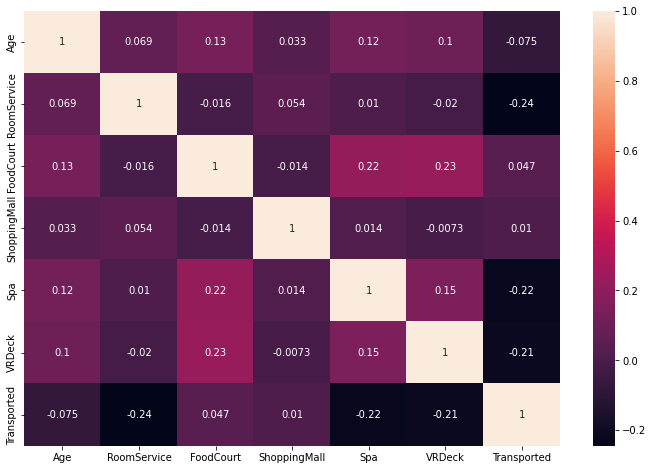

In [21]:
dfcorr=traindf.corr()
plt.figure(figsize=(12,8))
sns.heatmap(dfcorr, annot=True)

In [ ]:
#expenditure columns have correlation with each other and has an overall negative corr with target 

In [67]:
#plotting age and transported to see the relation
bins=[10,20,30,40,50,60,70, 80, 90]
labels=[10,20,30,40,50,60,70,80]
ages=np.nan_to_num(cdf["Age"]).astype(int)

cat_age=pd.cut(ages, bins=bins, labels=labels, right=False)

cat_age

[30, 20, 50, 30, 10, ..., 30, 40, NaN, NaN, 40]
Length: 12970
Categories (8, int64): [10 < 20 < 30 < 40 < 50 < 60 < 70 < 80]

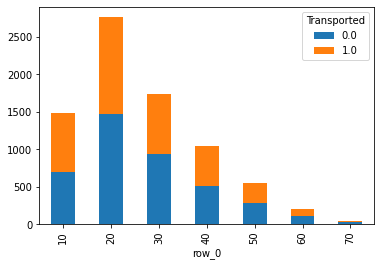

In [77]:
pd.crosstab(cat_age,cdf['Transported']).plot.bar(stacked=True)

In [ ]:
#<10 ratio is the highest wrt to 'Transported'

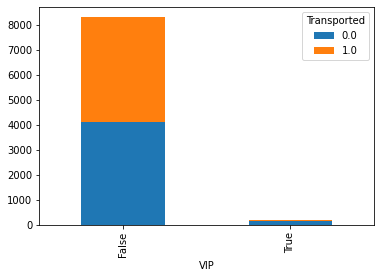

In [78]:
#VIP
pd.crosstab(cdf['VIP'],cdf['Transported']).plot.bar(stacked=True)

**CLEANING:**

In [79]:
cdf.drop(columns=["Transported"], inplace=True)

In [80]:
print(cdf.isnull().sum())

HomePlanet      288
CryoSleep       310
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
ind               0
Group             0
Deck            299
Num               0
Side            299
dtype: int64


In [82]:
for col in list(cdf):
  cdf[col]=cdf[col].fillna(cdf[col].mode()[0])

In [83]:
print(cdf.isnull().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
ind             0
Group           0
Deck            0
Num             0
Side            0
dtype: int64


**FEATURE ENGINEERING:**

In [85]:
#Creating 'Minor' column: age < 10

cdf["Minor"]=cdf["Age"] <=10

In [92]:
#creating Total Expense column : roomservice + FoodCourt + shoppingMall + Spa + VRDeck

cdf["Total_Expense"]=cdf['FoodCourt']+cdf['RoomService'] + cdf['ShoppingMall'] + cdf['Spa'] + cdf["VRDeck"]

#Creating Expenditure column: Total_Expense==0

cdf['Expenditure']=cdf['Total_Expense'] > 0

In [93]:
cdf

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,ind,Group,Deck,Num,Side,Minor,Total_Expense,Expenditure
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,train,1,B,0,P,False,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,train,1,F,0,S,False,736.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,train,1,A,0,S,False,10383.0,True
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,train,2,A,0,S,False,5176.0,True
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,train,1,F,1,S,False,1091.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,test,2,G,1496,S,False,0.0,False
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,test,1,F,0,S,False,1018.0,True
4274,Mars,True,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,test,1,D,296,P,False,0.0,False
4275,Europa,False,TRAPPIST-1e,18.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,test,1,D,297,P,False,3203.0,True


In [117]:
for col in list(cdf):

  if cdf[col].dtypes == 'bool':

    cdf[col]=cdf[col].astype(int)

In [118]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     12970 non-null  object 
 1   CryoSleep      12970 non-null  int64  
 2   Destination    12970 non-null  object 
 3   Age            12970 non-null  float64
 4   VIP            12970 non-null  int64  
 5   RoomService    12970 non-null  float64
 6   FoodCourt      12970 non-null  float64
 7   ShoppingMall   12970 non-null  float64
 8   Spa            12970 non-null  float64
 9   VRDeck         12970 non-null  float64
 10  Name           12970 non-null  object 
 11  ind            12970 non-null  object 
 12  Group          12970 non-null  int64  
 13  Deck           12970 non-null  object 
 14  Num            12970 non-null  int64  
 15  Side           12970 non-null  object 
 16  Minor          12970 non-null  int64  
 17  Total_Expense  12970 non-null  float64
 18  Expendi

In [119]:
cdf.to_csv("ProcessedData.csv")